# Coding Block 4 - Afternoon

## Optimizing Decision Tree Performance

What are criteria we want to optimize the code for?

- **criterion :  optional (default=”gini”) or Choose attribute selection measure**: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- **splitter : string, optional (default=”best”) or Split Strategy**: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- **max_depth : int or None, optional (default=None) or Maximum Depth of a Tree**: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting ([Source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3.  Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.


### Load the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
from plotly.tools import FigureFactory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
'''
...
'''

'\n...\n'

### Read the dataset 

In [2]:
df = pd.read_csv("../data/df_imputed_clean.csv")

## Do some hyperparameter tuning to benchmark different decision tree models

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# X und y definieren
X = df.drop(columns=["Outcome"])  # Alle Spalten außer "outcome"
y = df["Outcome"]  # Zielvariable

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Parameter für Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Verwende StratifiedKFold mit weniger Splits
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=cv, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Beste Parameter und Performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Beste Hyperparameter:", grid_search.best_params_)
print("Test-Genauigkeit:", accuracy)


Beste Hyperparameter: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test-Genauigkeit: 0.7397260273972602


## Use the information of the decision tree classifier to produce simple plots and information for stakeholders.
What are some relevant patterns to predict diabetes?

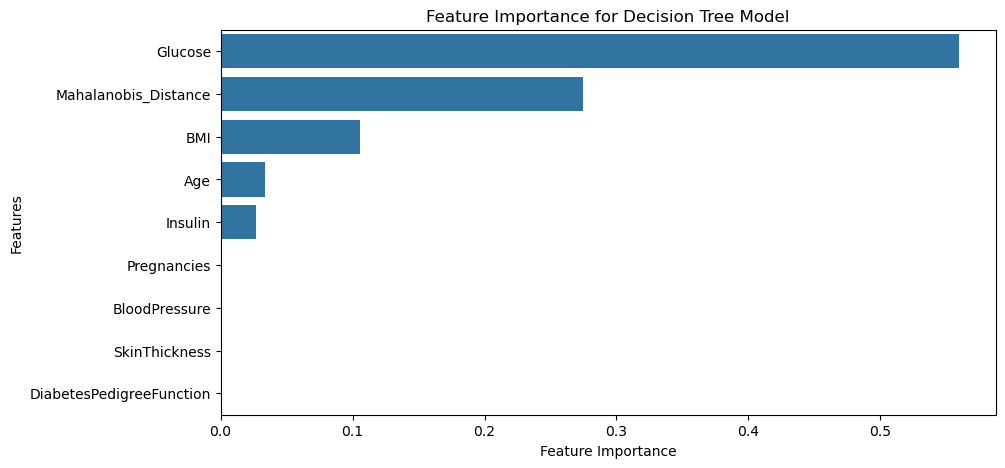

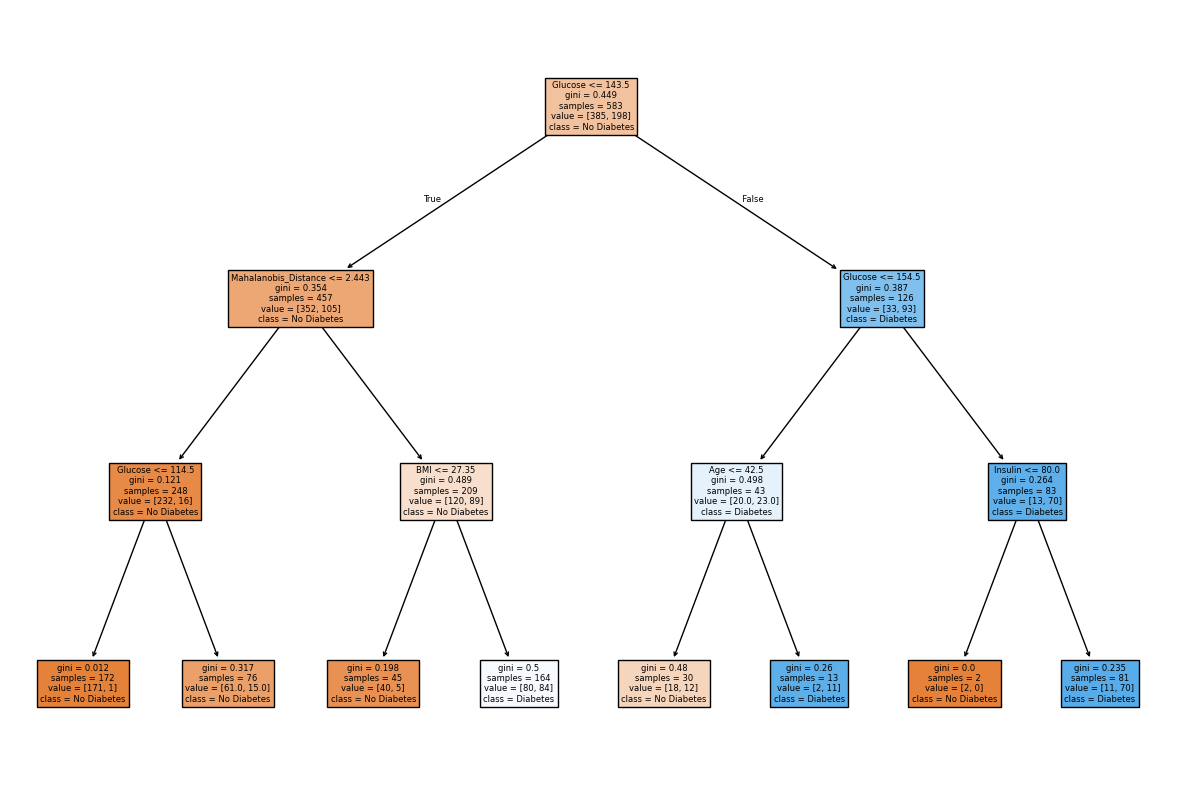

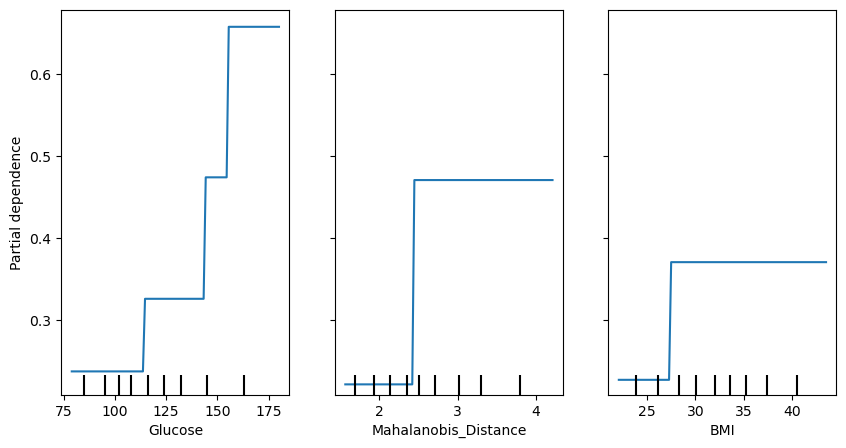

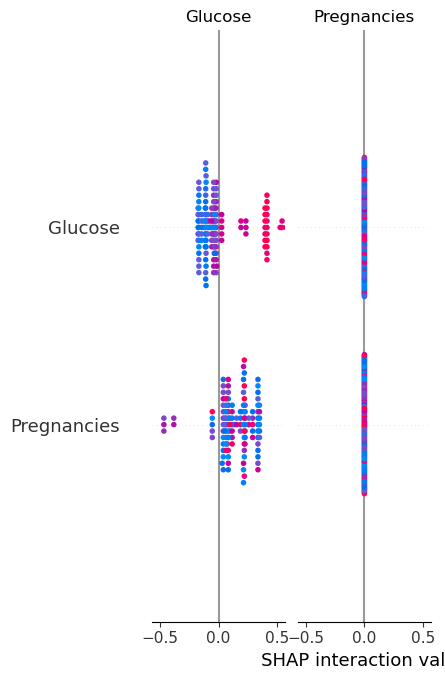

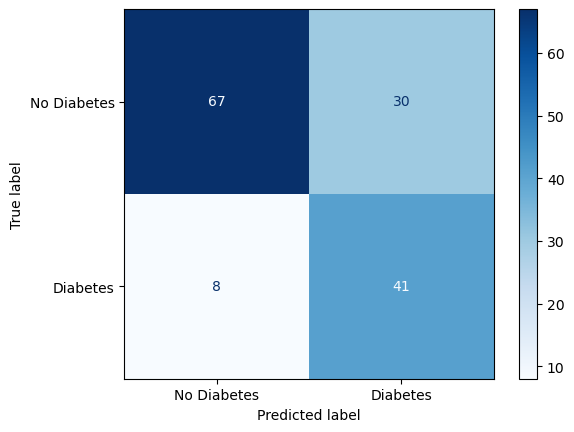

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import PartialDependenceDisplay
import shap


df = df.loc[:, ~df.columns.str.contains('Unnamed', case=False)]  # Entfernt "Unnamed: 0" falls vorhanden

# X und y definieren
X = df.drop(columns=["Outcome"])  # Korrekte Spaltenbezeichnung
y = df["Outcome"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Decision Tree Modell trainieren (Erhöhte Tiefe für bessere Feature-Auswahl)
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=2, min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

# 1. Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Decision Tree Model")
plt.show()

# 2. Decision Tree Visualization
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

# 3. Partial Dependence Plots (Fix: Spaltenindizes verwenden)
features_to_plot = [X.columns.get_loc(col) for col in feature_importances.index[:3]]  # Top 3 Features als Index
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features=features_to_plot, ax=ax)
plt.show()

# 4. SHAP Values (Fix: TreeExplainer nutzen)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 5. Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.show()


In [31]:
# Erneute Durchführung der Hyperparameter-Optimierung mit sicherer Einstellung

# GridSearch mit einer einzelnen CPU (n_jobs=1, um BrokenProcessPool zu vermeiden)
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

# Bestes Modell speichern und ausgeben
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Ausgabe der besten Parameter und Kreuzvalidierungsgenauigkeit
best_params, best_score


({'criterion': 'gini',
  'max_depth': 5,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 np.float64(0.7752929773548329))

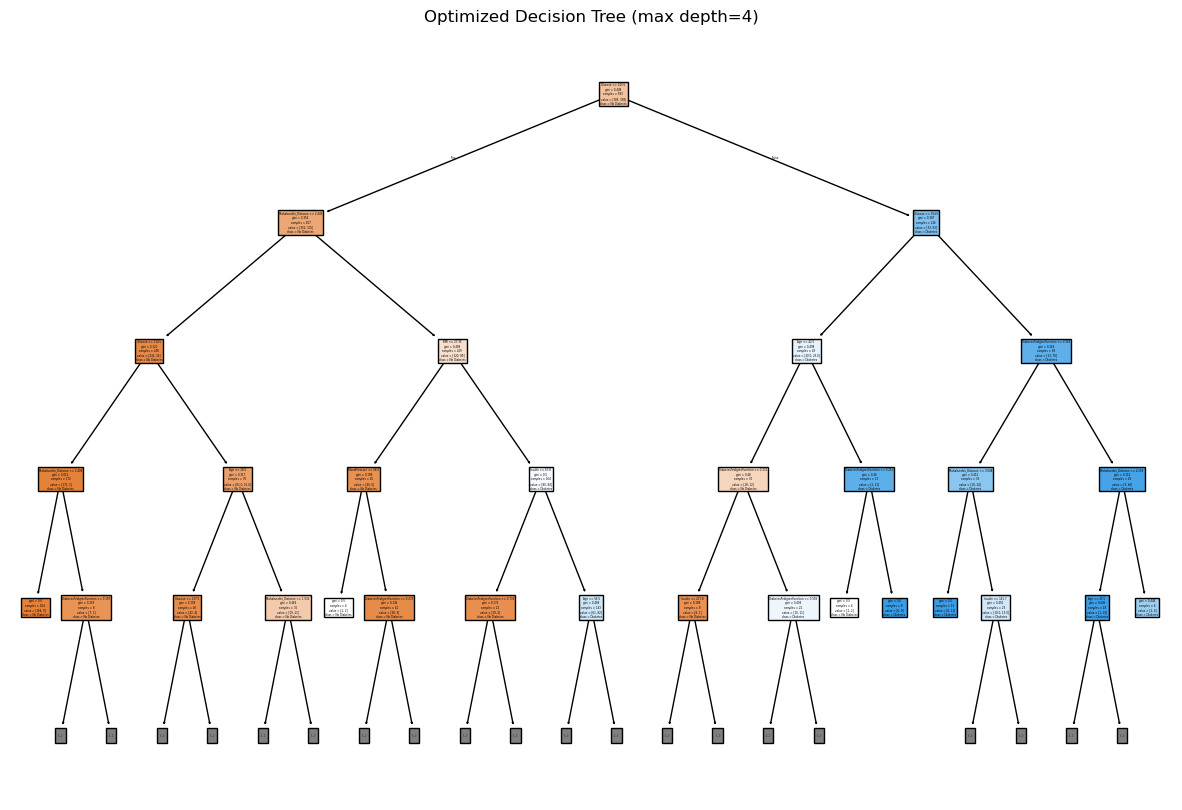

/var/folders/5w/h4z5hq9j70s0kq9njbq1fktc0000gn/T/ipykernel_25869/1051485337.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




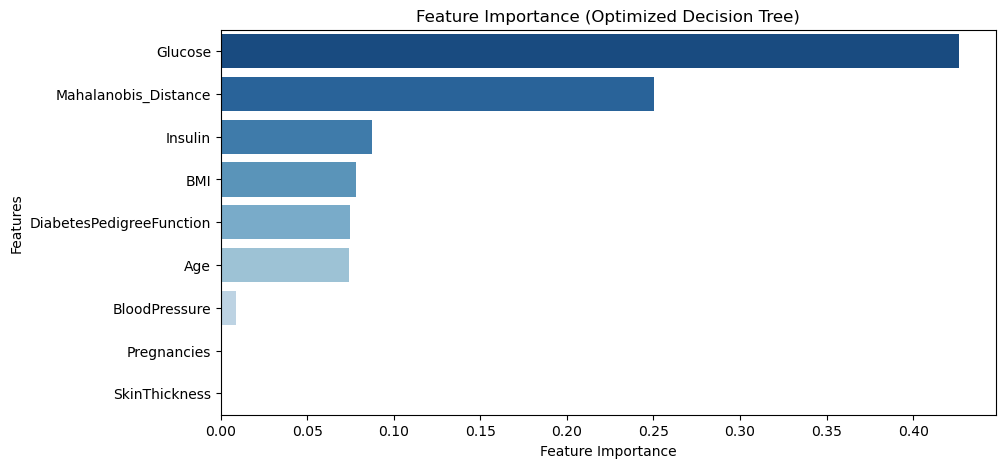

Glucose                     0.426322
Mahalanobis_Distance        0.250099
Insulin                     0.087687
BMI                         0.078231
DiabetesPedigreeFunction    0.074516
Age                         0.074000
BloodPressure               0.009144
Pregnancies                 0.000000
SkinThickness               0.000000
dtype: float64

In [32]:
# Visualisierung des besten Entscheidungsbaums
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, max_depth=4)
plt.title("Optimized Decision Tree (max depth=4)")
plt.show()

# Feature Importance Plot für das optimierte Modell
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="Blues_r")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Optimized Decision Tree)")
plt.show()

# Ausgabe der Features mit ihrer Wichtigkeit
feature_importances


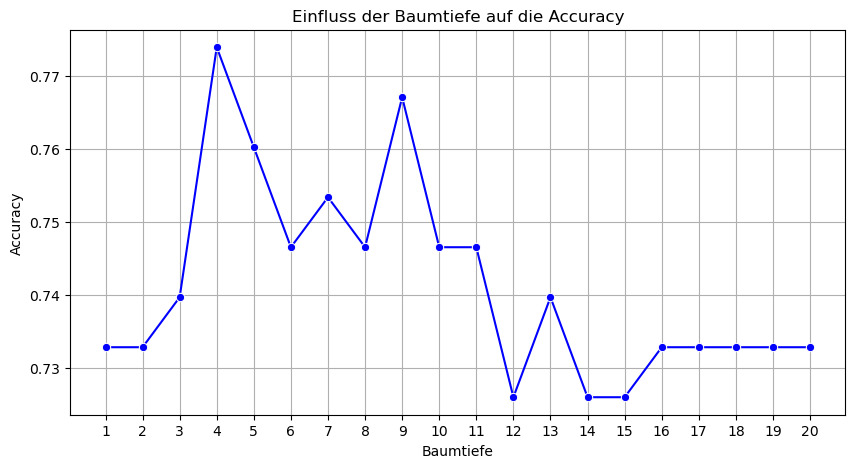

/var/folders/5w/h4z5hq9j70s0kq9njbq1fktc0000gn/T/ipykernel_25869/1088375937.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




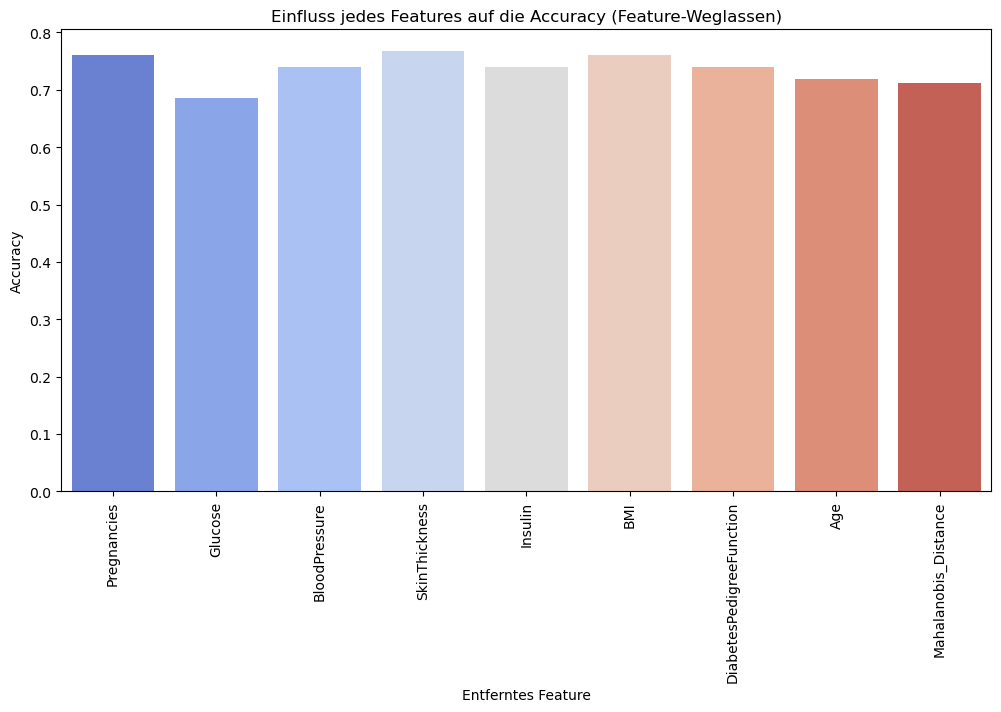

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Liste für die Ergebnisse
depths = list(range(1, 21))  # Baumtiefen von 1 bis 20
accuracies = []

# Teste verschiedene Baumtiefen
for depth in depths:
    model = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot der Accuracy vs. Baumtiefe
plt.figure(figsize=(10, 5))
sns.lineplot(x=depths, y=accuracies, marker="o", linestyle="-", color="b")
plt.xlabel("Baumtiefe")
plt.ylabel("Accuracy")
plt.title("Einfluss der Baumtiefe auf die Accuracy")
plt.xticks(depths)
plt.grid()
plt.show()

# Teste, wie sich die Accuracy ändert, wenn einzelne Features entfernt werden
feature_accuracies = {}

for feature in X.columns:
    X_train_mod = X_train.drop(columns=[feature])
    X_test_mod = X_test.drop(columns=[feature])
    
    model = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=42)  # Beste gefundene Tiefe
    model.fit(X_train_mod, y_train)
    y_pred = model.predict(X_test_mod)
    
    feature_accuracies[feature] = accuracy_score(y_test, y_pred)

# Plot der Accuracy bei entferntem Feature
plt.figure(figsize=(12, 6))
sns.barplot(x=list(feature_accuracies.keys()), y=list(feature_accuracies.values()), palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Entferntes Feature")
plt.ylabel("Accuracy")
plt.title("Einfluss jedes Features auf die Accuracy (Feature-Weglassen)")
plt.show()
